# LOAN-DEFAULT PREDICTION PROJECT

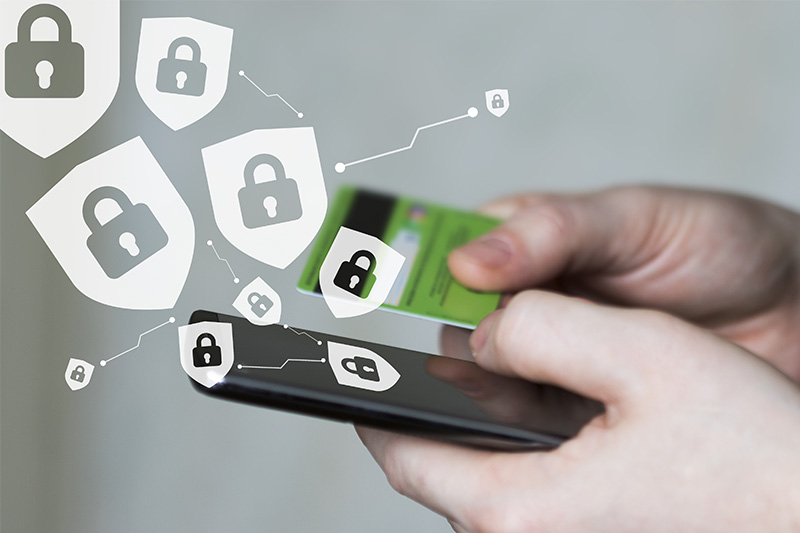

## Roadmap of this project:

**1. Data Loading**


*  Importing Required Libraries
*  Data Load



**2.Exploratory Data Analysis**



*  Check Information
*  Check the stats of the dataset



**3.Feature Engineering**



*  PCA
*  Scaling the dataset
*  SMOTETomek(handle imbalance)



**4.Feature Selection**


*  Co-Relation matrix
*  smotetomek
*  SelectKBest
*  RFE(Recursive Feature Elimination)
*  RFECV(Recursive Feature Elimination with cross-Validation)
*  Permutation Importance
*  SelectFromModel



**Model Building**

*  Random forest classifier
*  Decision tree classifier
*  Logistic Regression
*  Support Vector Machine(SVC)
*  AdaBoost Classifier
*  Gradient Boosting classifier

**Hyper-Parameter Tuning**

*  RandomizedSearchCV with Random forest and cv = StratifiedKFold
*  Results in the Accuracy of 88% with very low False Negitives.



# Importing Required Libraries

In [44]:
#install eli5 library
!pip install eli5

In [10]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.feature_selection import f_regression , SelectKBest , f_classif
pd.options.display.max_columns = 775
pd.options.display.max_rows = 775
from sklearn.metrics import r2_score , classification_report , confusion_matrix
import eli5
from sklearn.model_selection import train_test_split , cross_val_score
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from tqdm import tqdm
import warnings
from sklearn.ensemble import GradientBoostingClassifier
warnings.simplefilter("ignore")

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data=pd.read_csv("/content/drive/MyDrive/Copy of train_v2.csv")

# Data Load

# Exploratory Data Analysis

In [30]:
#check the shape of train
data.shape

(105471, 771)

In [31]:
#print the head of train
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f464,f465,f466,f467,f468,f469,f470,f471,f472,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f534,f535,f536,f537,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f626,f627,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f695,f696,f697,f698,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,7,0.7607,0.7542,612922,0.7236,0.7236,0.5171,0.7236,0.8476,0.7876,1.097851e+09,89,66,998046.0,89.0,89.0,89.00,89.00,89.0,0.9271,0,0,0,5,0,0,0.73180,0.72124,0.749280,5.0,0.026826,1.037424,0.833

In [32]:
# CHECKING INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [33]:
# TRAIN DATA DESCRIPTION
data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f464,f465,f466,f467,f468,f470,f471,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f535,f536,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f696,f697,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,105471.000000,105471.000000,105371.000000,105423.000000,1.054710e+05,105312.000000,105448.000000,105448.000000,105011.000000,103631.000000,103773.000000,1.047730e+05,105471.000000,105471.000000,1.04773

# Dealing with Target Column


Note:

The loan Defaulter prediction can be more accurate whether the person would deposit the loan or not.

0 indicates the person is fair and other than this indicates they are defaulters so we can replace all values except 0 as 1 1 indicates the person is defaulter

In [35]:
# SPLITTING TARGET COLUMN INTO 0 AND 1 (make anything which is less than 1 as 0)
data.loss.loc[data.loss!=0]=1

In [37]:
#check the train 'loss' value_counts
data.loss.value_counts()

0    95688
1     9783
Name: loss, dtype: int64

In [38]:
#Checking for Duplicacy in Dataset
data.drop_duplicates().shape

(105471, 771)

In [39]:
#check the information of train
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


As our file is very large we will convert the large size dataframe i.e more memory into low size dataframe.
i.e we will convert them into lower dtypes

In [42]:
#change the dtype into low memory form so that extra memory is saved and as a result training model will be more faster

for col in data.select_dtypes('number'):
    data[col] = pd.to_numeric(data[col], downcast='integer')
    if data[col].dtype == 'float':
        data[col] = pd.to_numeric(data[col], downcast='float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float32(535), float64(118), int16(31), int32(13), int64(11), int8(44), object(19)
memory usage: 350.2+ MB


## Feature Engineering

## Interpretation of Categorical Columns

As the Dataset does not Contain data Dictionary it is impossible to interpret the Columns and there Values on aspect to target column , More over in practice adding categorical column one by one to model features for understanding the factor affecting the model accuracy

In our Case the Categorical columns would be scaled in the range of Numerical columns and treated according to it

# PCA

What is PCA?

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

PCA can be used when the dimensions of the input features are high.

Note: We are having high dimension. therefore it is always preferable to apply PCA to get the insight.

In [46]:
#create a list comprehension comprising of column names that are of int type
numerical_columns = [col for col in data.columns if data[col].dtype != 'object']
#select only the numerical_columns from train
data = data[numerical_columns]
#drop the rows in which loss is null (axis=0)
data.dropna(axis = 0, subset= ["loss"], inplace=True)
#drop 'loss' from train (independent variable)
x = data.drop(columns = "loss")
#dependent varible 'loss'
y= data.loss

In [48]:
# SCALING DATA BEFORE APPLYING

#create a object os Standard scaler
scaling=StandardScaler()

#iterate over the columns and fill null values with mean and scale the dataframe
for col in x.columns:
    #train columns
    x[col].fillna(x[col].mean() , inplace = True)
    x[col] = scaling.fit_transform(x[[col]])

#make a dataframe passing x
Scaled_data = pd.DataFrame(x)

In [49]:
# PCA WITH RESEMBLING 95% OF EXACT OF THE DATASET

#create an object of PCA with n_components=0.95
principal=PCA(n_components=0.95)

#fit it on Scaled_data

principal.fit(Scaled_data)
#transform the Scaled_data
x_scaled = principal.transform(Scaled_data)

In [50]:
# INFERENCING THE SCALED AND PCA COMPONENTS
x_scaled.data

Principal component analysis (PCA) is an unsupervised machine learning technique. Perhaps the most popular use of principal component analysis is dimensionality reduction. Besides using PCA as a data preparation technique, we can also use it to help visualize data. A picture is worth a thousand words. With the data visualized, it is easier for us to get some insights and decide on the next step in our machine learning models.



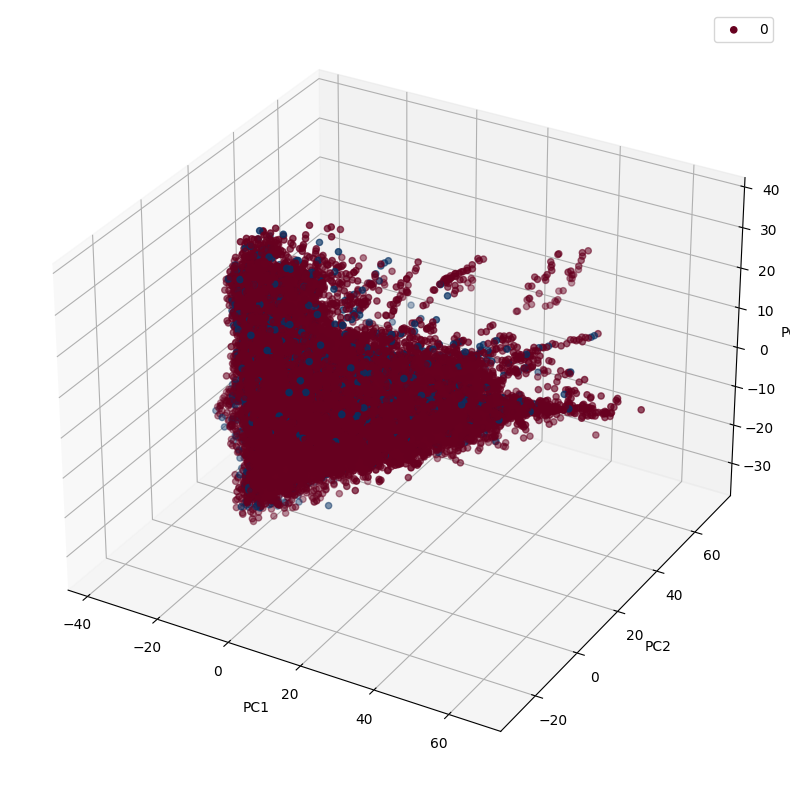

In [51]:
# TARGET COLUMN VARIES FROM 0 TO 100, THERE ARE 100 CLASSES IN IT WHICH ARE OVERLAPPING
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,0],x_scaled[:,1],x_scaled[:,2], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.legend([0 , 1])

**Note:** Nothing conclusive we can find by taking the first three columns in PCA. As we are clearly seeing the data is spreaded all over in a random fashion

Text(0.5, 0, 'PC3')

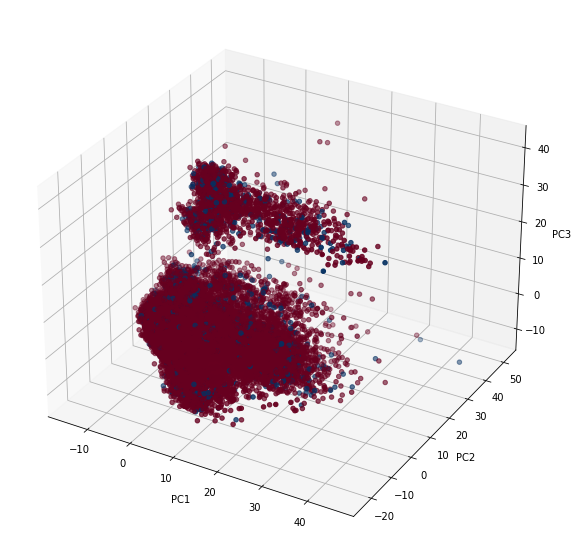

In [ ]:
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,3],x_scaled[:,4],x_scaled[:,5], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


Text(0.5, 0, 'PC3')

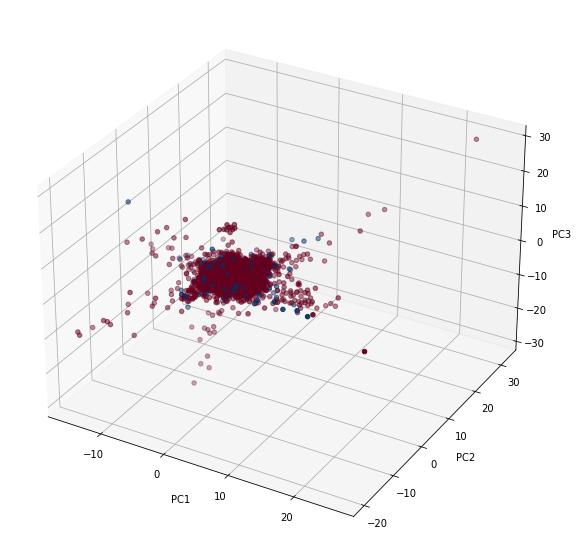

In [ ]:
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_scaled[:,100],x_scaled[:,102],x_scaled[:,105], c= y ,cmap='RdBu')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


**Note:** It is clearly visible that nothing conclusive we can find with PCA

In [52]:
# DATAFRAME AFTER PCA
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,-16.658590,7.477992,-4.633460,-3.346112,-2.981803,-3.179083,4.984231,-2.275360,-4.131422,-0.826318,-1.814937,5.050628,1.356760,-0.635433,-0.065211,0.134584,5.251860,-3.569705,1.000678,-7.454160,-2.263511,-2.275381,2.578391,1.941504,-1.085244,-0.787216,-0.009111,-0.976673,-0.177454,0.587642,1.709798,0.073405,0.894779,0.994605,-2.089418,1.326086,1.770483,0.511770,2.739136,-0.488805,-2.229457,-0.793695,1.323090,0.362113,1.391509,-0.004184,0.548426,-0.074208,0.127108,-0.937549,-0.060910,1.270100,1.555846,0.627823,-0.819644,0.573233,-0.082946,1.091681,0.925615,0.316964,-0.816069,-0.554053,1.866552,0.437756,-0.393410,-0.374818,0.585594,-0.155607,0.803440,0.501708,-0.756649,-0.377024,-0.047811,1.848630,-0.179661,0.661914,-0.540827,-0.168399,-0.396629,-0.052654,-0.954219,0.475460,0.365610,0.315976,0.915894,-1.158851,1.063063,-1.128673,0.591028,0.758736,0.426624,0.151355,-0.620294,0.188592,-0.393904,0.509199,-0.086408,0.769599,-1.364257,-0.491091,-0.002212,0.389940,0.567437,0.709264,-0.326163,0.692702,-0.487928,-0.059753,0.112035,0.969071,-0.465676,-0.050262,0.368379,-0.073949,-0.149880,0.571324,-0.662433,0.639596,0.462887,1.039653,-0.293882,0.412429,0.037721,-0.568486,0.083566,1.861148,-1.458762,-0.112055,0.247668,-0.157078,0.821546,0.074453,-0.402154,-0.344040,2.007353,-0.261104
1,2.189695,-13.578664,1.893016,-0.925884,-5.648501,2.894702,-2.197431,5.493275,0.279407,2.737511,0.452401,1.483191,1.443079,0.327238,0.336790,-1.510241,0.590133,3.874455,2.632428,-1.755843,-0.353602,-0.766808,1.152653,0.982419,-1.614268,-0.501903,-0.183728,0.442634,2.197160,0.378654,0.916647,-0.837690,1.137273,-0.324596,-1.623797,-0.680552,-1.721005,0.715994,2.892137,-0.208765,0.171050,0.874119,0.493658,-0.633691,-0.215202,0.381434,0.254754,-0.256401,0.071381,0.542626,-0.149343,-0.089728,0.856056,0.476077,-0.269071,-0.270990,0.086204,0.138571,-0.172948,-0.970720,0.760161,-0.320470,0.125741,0.700943,0.608862,-0.330389,-1.243762,-0.581209,-0.273640,-0.829115,0.670669,-1.374423,0.177301,0.797736,-0.423820,0.710373,-0.356740,-0.841465,-0.504208,0.074504,0.443777,0.214660,0.494269,-0.709675,0.210701,0.306656,0.033926,0.094341,0.310156,0.972768,-0.364586,0.859080,-1.186734,-0.450760,-0.092809,-0.441752,-0.763440,0.406759,-0.540505,-1.717169,-1.060261,1.212079,0.533835,-0.366979,-0.516613,0.379558,0.273042,0.462974,-0.571839,0.631045,0.778732,-0.414355,0.366371,0.424032,-0.288483,0.133672,0.145050,-0.104820,0.201167,0.016691,0.150985,-0.803413,0.792504,0.613328,0.065730,0.554793,-0.209789,0.112493,-1.869507,-0.875590,0.499542,-0.530371,-0.041460,0.517815,-1.535109,-0.600676
2,2.019792,-6.058516,0.748353,-4.040910,-1.076259,1.756933,-0.092934,-1.181018,-0.066574,-0.580505,0.760776,0.683723,0.155021,-1.053573,-0.803593,-0.801540,1.922225,5.176348,-1.270156,-0.631161,0.248067,1.364531,0.997283,1.104643,0.879600,-0.275277,-0.586035,0.226252,2.682895,-0.685286,0.642914,0.120381,2.178163,-1.361051,0.146298,0.809643,-0.742259,0.674184,-0.513264,-1.127725,1.783988,0.136945,-1.778275,-0.147770,0.899895,-0.246527,-0.810165,-0.432060,1.534055,0.704134,0.112904,-1.643261,0.084172,-0.269376,-1.769352,-0.493486,1.000519,-0.373149,2.235199,1.110218,0.169547,0.480596,-0.790396,-0.838355,-0.282352,-0.267668,0.603540,1.328971,-1.763104,-0.258696,-0.973197,-0.162370,-1.557976,1.737917,-1.401431,-0.152792,0.513738,0.964232,-0.817764,0.448660,0.828975,0.270811,1.686809,0.289647,-0.587382,1.072499,-0.332234,-2.021795,-0.117142,-0.496450,0.686518,-0.777098,-0.603621,0.050992,0.292998,-0.028526,0.988882,0.291144,-1.025033,-1.173382,-0.898795,1.549203,-0.093724,

In [53]:
#create a list comprehension comprising of column names that are of int type
numerical_columns = [col for col in data.columns if data[col].dtype != 'object']
#select only the numerical_columns from train
data = data[numerical_columns]
#drop the rows in which loss is null (axis=0)
data.dropna(axis = 0, subset=["loss"], inplace=True)
#drop 'loss' from train (independent variable)
f1 = data.drop(columns = "loss")
#dependent variable
t1 = data.loss

In [54]:
# IMPUTING NULL VALUES WITH MEAN VALUE AND SCALING THE DATA WITH STANDARD SCALER
scaler = StandardScaler()

#iterate over the columns and fill null values with mean and scale the dataframe
for col in f1.columns:
    #train columns
    f1[col].fillna(f1[col].mean() , inplace = True)
    f1[col] = scaler.fit_transform(f1[[col]])

In [ ]:
# VISUALIZATION OVER THE TARGET COLUMN
sns.countplot(t1)

**Note:** It is highly imbalanced dataset,having 1 around 20000 and 83000.
     
          If we will do balancing, possibly we loose a lot of 0 class data.

# Feature Selection

# What is correlation?

Correlation is a statistical measure that expresses the extent to which two  variables are linearly related.

Correlation explains how one or more variables are related to each other

In [ ]:
# FINDING THE CORRELATION OF EACH COLUMN WITH TARGET COLUMN WITH CORRELATION MATRIX`

#create a empty list corr_data
corr_data = []

#apply the .corr() fucntion on the columns using loop
for col in f1:
    #check the co-relation of 'loss' with other columns
    corr = data["loss"].corr(data[col])
    if not np.isnan(corr):
        corr_data.append([col, abs(corr)])

#create a dataframe storing the correlation values
corr_data = pd.DataFrame(corr_data, columns = ['column_name','% corr']).sort_values(by = '% corr', ascending = False)

#print the first 10 rows of corr_data
corr_data[:10]

## Distribution plot for Top 5 columns

<AxesSubplot:xlabel='f766', ylabel='Count'>

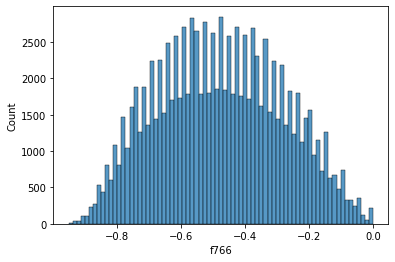

In [ ]:
#plot the hist plot of 'f766'
sns.histplot(data.f766)

<AxesSubplot:xlabel='f404', ylabel='Count'>

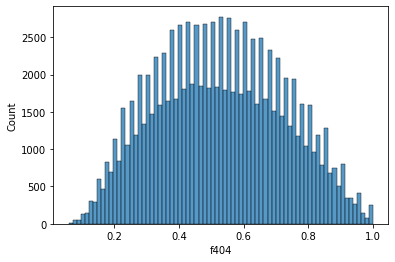

In [ ]:
#plot the hist plot of 'f404'
sns.histplot(data.f404)

<AxesSubplot:xlabel='f322', ylabel='Count'>

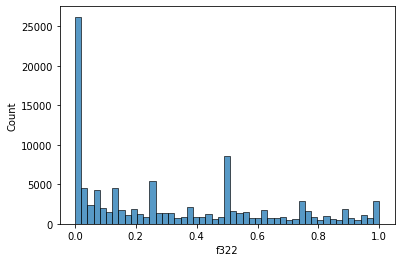

In [ ]:
#plot the hist plot of 'f322'
sns.histplot(data.f322)

<AxesSubplot:xlabel='f405', ylabel='Count'>

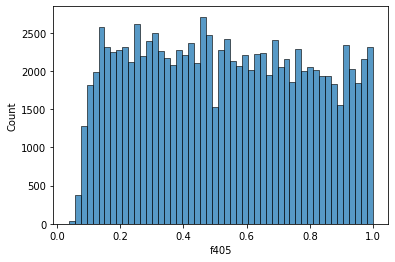

In [ ]:
#plot the hist plot of 'f405'
sns.histplot(data.f405)

<AxesSubplot:xlabel='f767', ylabel='Count'>

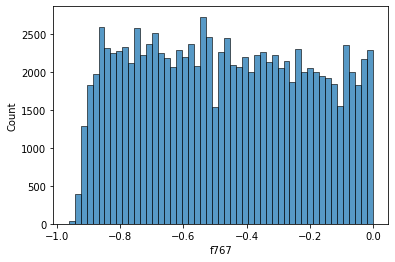

In [ ]:
#plot the hist plot of 'f767'
sns.histplot(data.f767)

The data is normally distributed

In [ ]:
#create a train-test split of the top 10 columns  we got as the output of PCA
f2 = data[corr_data[:10]["column_name"]]

#store loss in t2
t2 = data.loss


for col in f2.columns:

    #fill all the na values with mean
    f2[col].fillna(f2[col].mean() , inplace = True)

#train-test split of f2,t2
X_train1, X_test1, y_train1, y_test1 =train_test_split(f2,t2,test_size=0.2,random_state=30)

#### SMOTETOMEK is somewhere upsampling and downsampling. SMOTETomek is a hybrid method which is a mixture of the above two methods, it uses an under-sampling method (Tomek) with an oversampling method (SMOTE).

In [ ]:
#use the smotetomek technique on X_tain1,y_train1 to handle the imbalance

from collections import Counter

from imblearn.combine import SMOTETomek


X =X_train1
y = y_train1
print('Original dataset shape %s' % Counter(y))

#create a smotetomek object
sm = SMOTETomek(random_state=42)


#use the fit_resample function in X,y

X_train_balanced, y_train_balanced = sm.fit_sample(X,y)

#print the X_train_balanced, y_train_balanced
print("Resampled dataset shape Counter" % Counter(y_train_balanced))


Original dataset shape Counter({0: 76582, 1: 7794})
Resampled dataset shape Counter({1: 75753, 0: 75753})


In [ ]:
#check the shape of X_train_balanced
X_train_balanced.shape

(151506, 10)

In [ ]:
#we will create this model just to get a basic idea of the training
#create a random forest model and fit X_train_balanced,y_train_balanced

#create  a object with n_estimatios=300,criteria='entropy'
model = RandomForestClassifier(n_estimatiors=300,criteria='entropy')

#fit it on X_train_balanced, y_train_balanced
model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(criterion='entropy', n_estimators=300)

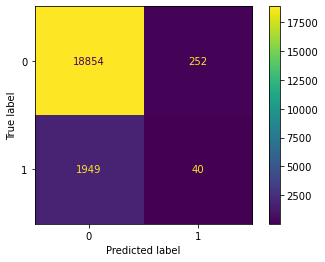

In [ ]:
#print the classification report
classification_report(y_test1,model.predict(X_test1))

#print the confusion matrix
confusion_matrix(model,X_test1,y_test1)

By running this model we got the basic idea of fitting the data on the model...justto get familier with training later we will using different models

In [ ]:
#training Logistic Regression model on dataset columns based on correlation data
#Results are pretty clear model is unable to Understand the 1st class with columns

#create a logistic reg model and fit on X_train_balanced,y_train_balanced
model_lr = LogisticRegression(n_jobs=-1).fit(X_train_balanced,y_train_balanced)

#predict the X_test1
y_predicts =model_lr.predict(X_test1)

#print the classification report
print(classification_report(y_test1,y_predicts))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71     19106
           1       0.14      0.66      0.23      1989

    accuracy                           0.57     21095
   macro avg       0.54      0.61      0.47     21095
weighted avg       0.86      0.57      0.66     21095



In [ ]:

# example of grid searching key hyperparametres for logistic regression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = X_train_balanced , y_train_balanced


# define logisticregression model and parameters
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


# create a dictionary with the above hyper-parameters
grid = dict(solver=solvers,penalty=penalty,C=c_values)


#create a object of  RepeatedStratifiedKFold with n_splits=10, n_repeats=3
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)

#create a gridsearchcv object with these hyperparameters
grid_search = GridSearchCV(estimator model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
#fit the model on X,y
grid_result = grid_search.fit(X, y)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.604944 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604920 (0.003498) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604702 (0.003480) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604726 (0.003532) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.604944 (0.003495) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604656 (0.003484) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604601 (0.003547) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.604711 (0.003407) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604601 (0.003564) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604700 (0.003463) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.604522 (0.003353) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.604531 (0.003426) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.604546 (0.003374) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.604198 (0.003437) with

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     19106
           1       0.15      0.30      0.20      1989

    accuracy                           0.77     21095
   macro avg       0.54      0.56      0.54     21095
weighted avg       0.85      0.77      0.81     21095



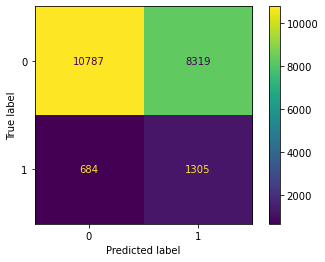

In [ ]:
#print the classification report and confusion matrix
print(classification_report(y_test1,y_preds))
confusion_matrix(grid_search,X_test1,y_test1)

In [ ]:
#import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

## Feature Selection Using SelectKBest

The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training.

In [ ]:
# feature selection function using selectKbest
def select_features(X_train_, y_train_, X_test_,criteria):
    # configure to select a subset of features
    fs = SelectKBest(score_func=criteria, k=20)
    # learn relationship from training data
    fs.fit(X_train_, y_train_)
    # transform train input data
    X_train_fs = fs.transform(X_train_)
    # transform test input data
    X_test_fs = fs.transform(X_test_)
    return X_train_fs, X_test_fs, fs

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train.head(10000), y_train.head(10000), X_test.head(10000),mutual_info_classif)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.59


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train.head(10000), y_train.head(10000), X_test.head(10000),f_classif)
# fit the model SVC with kernel='poly'
model =SVC(kernel="poly")
model.fit(X_train_fs, y_train.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.59


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train.head(10000), y_train.head(10000), X_test.head(10000),f_classif)
# fit the model svc with kernel='linear'
model = SVC(kernel="linear")
model.fit(X_train_fs, y_train.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy =accuracy_score(y_test.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.59


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train.head(10000), y_train.head(10000), X_test.head(10000),f_classif)
# fit the model logistic R with solver='newton-cg'
model =LogisticRegression(solver='newton-cg')
model.fit(X_train_fs, y_train.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.60


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train.head(10000), y_train.head(10000), X_test.head(10000),f_classif)
# fit the model logistic regression with penalty='l1',solver='liblinear'
model = LogisticRegression(penalty='l1',solver='liblinear')
model.fit(X_train_fs, y_train.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy =  accuracy_score(y_test.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.59


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train.head(10000), y_train.head(10000), X_test.head(10000),f_classif)
# fit the model svc with kernel='sigmoid'
model =SVC(kernel='sigmoid')
model.fit(X_train_fs, y_train.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.81


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train.head(10000), y_train.head(10000), X_test.head(10000),mutual_info_classif)
# fit the model DTC
model = DecisionTreeClassifier()
model.fit(X_train_fs, y_train.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.98


In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train.head(10000), y_train.head(10000), X_test.head(10000),mutual_info_classif)
# fit the model RFC
model = RandomForestClassifier()
model.fit(X_train_fs, y_train.head(10000))
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test.head(10000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.64


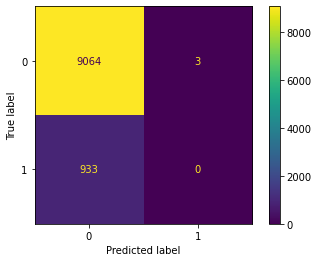

In [ ]:
#plot the confusion matrix for model(RandomFClassifier)
plot_confusion_matrix(model , X_test_fs , y_test.head(10000) )

## RFECV

**Recursive Feature Elimination**, Cross-Validated (RFECV) feature selection. Selects the best subset of features for the supplied estimator by removing 0 to N features (where N is the number of features) using recursive feature elimination, then selecting the best subset based on the cross-validation score of the model.

In [ ]:
# create pipeline RFECV with RandomForestClassifier(),parameters : min_features_to_select=5,cv=5
rfe = RFECV(estimator=RandomForestClassifier(),min_features_to_select=5,cv=5)

model = LogisticRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on sample available data 5000 rows
pipeline.fit(X_train.head(5000), y_train.head(5000))
# make a prediction
yhat = pipeline.predict(X_test.head(5000))


accuracy = accuracy_score(y_test.head(5000),ychat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.80


## RFE

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
# create pipeline
#create a RFE object with estimator as logistic regression and n_features_to_select=20
rfe = RFE(estimator LogisticRegression(), n_features_to_select=20)
#create a object of Logistic Regression
model = LogisticRegression(n_jobs= -1)
#define a pipeline with steps=[('s',rfe), ('m', model)]
pipeline = Pipeline(steps=[('s',rfe), ('m', model)])
# fit the model on sample available data
pipeline.fit(X_train.head(1000), y_train.head(1000))
# make a prediction for one example
yhat = pipeline.predict(X_test.head(1000))
#get the accuracy_score using (y_test.head(1000), yhat)
accuracy = accuracy_score(y_test.head(1000), yhat)
#print the accuracy
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# create pipeline
#create a RFE object with estimator as logistic regression and n_features_to_select=2
rfe = RFE(estimator= LogisticRegression(), n_features_to_select=20)
#create an object of RandomF classifer
model = RandomForestClassifier()
#define a pipeline with steps=[('s',rfe), ('m', model)]
pipeline = Pipeline(steps=[('s',rfe), ('m', model)])
# fit the model on sample available data
pipeline.fit(X_train.head(1000), y_train.head(1000))
# make a prediction
yhat = pipeline.predict(X_test.head(1000))
accuracy = accuracy_score(y_test.head(1000), yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# prompt: #create a RFE object with estimator as logistic regression and n_features_to_select=20 rfe =   #create an object of  AdaBoostClassifier model =   #define a pipeline with steps=[('s',rfe),('m',model)] pipeline =   # fit the model on sample available data pipeline.fit(X_train.head(1000), y_train.head(1000))  # make a prediction  yhat =   accuracy =  print('Accuracy: %.2f' % (accuracy*100))

rfe = RFE(estimator= LogisticRegression(), n_features_to_select=20)
model = AdaBoostClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_train.head(1000), y_train.head(1000))
yhat = pipeline.predict(X_test.head(1000))
accuracy = accuracy_score(y_test.head(1000), yhat)
print('Accuracy: %.2f' % (accuracy*100))


# Feature Selection using Permutation Importance

What is Feature Permutation Importance?

Feature permutation importance measures the predictive value of a feature for any black box estimator, classifier, or regressor.

It does this by evaluating how the prediction error increases when a feature is not available

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. It is implemented in scikit-learn as permutation_importance method. As arguments it requires trained model (can be any model compatible with scikit-learn API) and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

In [ ]:
# TRAINING A BASE MODEL TO UNDERSTAND FEATURES AND EXTRACTING FEATURE IMPORTANCE

#create a logistic R model
model  =   LogisticRegression().fit(X_train , y_train )

#create a permutationImportance object and fit (X_test.head(2000), y_test.head(2000))
permute = PermutationImportance(model,random_sate=20).fit(X_test.head(2000), y_test.head(2000))

#print the weights
eli5.show_weights( permute , feature_names = X_test.columns.tolist() )

Weight,Feature
0.0098 ± 0.0059,f596
0.0028 ± 0.0028,f674
0.0023 ± 0.0010,f2
0.0022 ± 0.0020,f378
0.0019 ± 0.0012,f383
0.0018 ± 0.0005,f589
0.0017 ± 0.0016,f129
0.0015 ± 0.0006,f269
0.0014 ± 0.0007,f471
0.0014 ± 0.0004,f664


In [ ]:
permute

PermutationImportance(estimator=LogisticRegression(), random_state=20)

In [ ]:
# prompt: #create a list of top 7 important features features =

features = ['f404', 'f766', 'f322', 'f767', 'f405', 'f550', 'f321']


## Model Training

In [ ]:
#print the shape of X_train,y_train
X_train.shape,y_train.shape

((94923, 750), (94923,))

In [ ]:
#print the shape of X_test,y_test
X_test.shape,y_test.shape

((10548, 750), (10548,))

# SelectFromModel
# How does select from model work?

#### Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data. It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.

In [ ]:
# prompt: # ChOOSING IMPORTANT FEATURES using selectfrommodel # threshold 0.001 by default selector = SelectFromModel(permute, threshold=0.0015, prefit=True)  #tranform the X-train using selector X_train_req =   #tranform the X-test using selector  X_test_req =

selector = SelectFromModel(permute, threshold=0.0015, prefit=True)

#tranform the X-train using selector
X_train_req = selector.transform(X_train)

#tranform the X-test using selector
X_test_req = selector.transform(X_test)


In [ ]:
# REQUIRED FEATURES FOR TRAINING THE MODEL AND COMPARING THE ACTUAL DATA
X_train_req.shape , train.shape

((94923, 7), (105471, 751))

In [ ]:
#print shape of y_train
y_train.shape

(94923,)

In [ ]:
#value_counts of y_train
y_train.value_counts()

0    86120
1     8803
Name: loss, dtype: int64

In [ ]:
# prompt: #use the smotetomek technique on X_tain1,y_train1 to handle the imbalance on X_train_req and y_train   #print the value counts of y_train using counter   #define a SMOTETomek function sm = SMOTETomek(random_state=0)  #fit_resample on (X_train_req, y_train X_train_balanced, y_train_balanced =   #print the value counts of y_train_balanced using counter

#use the smotetomek technique on X_tain1,y_train1 to handle the imbalance
X = X_train_req
y = y_train
print('Original dataset shape %s' % Counter(y))

#create a smotetomek object
sm = SMOTETomek(random_state=0)


#use the fit_resample function in X,y

X_train_balanced, y_train_balanced = sm.fit_sample(X,y)

#print the X_train_balanced, y_train_balanced
print("Resampled dataset shape Counter" % Counter(y_train_balanced))


In [ ]:
#print the value_counts of y_train_balanced
y_train_balanced.value_counts()

0    85450
1    85450
Name: loss, dtype: int64

In [ ]:
#print the shape of X_train_balanced
X_train_balanced.shape

(170900, 7)

## RANDOMFORESTCLASSSIFIER

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      9568
           1       0.17      0.10      0.12       980

    accuracy                           0.87     10548
   macro avg       0.54      0.52      0.53     10548
weighted avg       0.84      0.87      0.86     10548



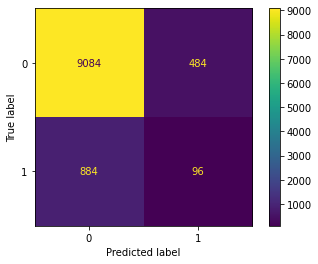

In [ ]:
# TRAINING MODEL ON RFC
#create a object of RFC with n_jobs=-1 and fit the ( X_train_balanced , y_train_balanced)
model_rf = RandomForestClassifier(n_jobs=-1).fit(X_train_balanced,y_train_balanced)

#predict the X_test_req
y_predicts = model_rf.predict(X_test_req)

#print the Classificatio Report
print(classification_report(y_test,y_predicts))

#print the confusion matrix
print(confusion_matrix(model_rf,X_test_req,y_test))
#print the confusion matrix


## Decision tREE cLASSIFIER

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      9568
           1       0.12      0.17      0.14       980

    accuracy                           0.81     10548
   macro avg       0.52      0.52      0.52     10548
weighted avg       0.84      0.81      0.82     10548



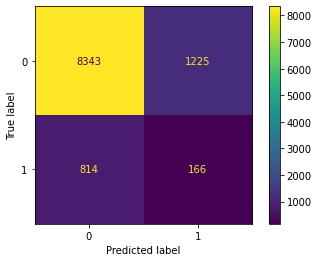

In [ ]:
# TRAINING MODEL ON DTC
from sklearn.tree import DecisionTreeClassifier
#create a model DecisionTreeClassifier() and fit  X_train_balanced , y_train_balanced
dtc = DecisionTreeClassifier().fit(X_train_balanced, y_train_balanced)

#predict the X_test_req
y_predicts = dtc.predict(X_test_req)

#classification REeport
print(classification_report(y_test,y_predicts))

#confusion Matrix
print(confusion_matrix(dtc,X_test_req,y_test))


## Logistic Regression

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      9568
           1       0.14      0.62      0.22       980

    accuracy                           0.60     10548
   macro avg       0.54      0.61      0.48     10548
weighted avg       0.86      0.60      0.68     10548



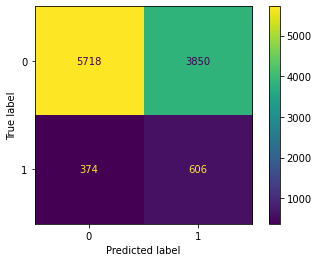

In [ ]:
#create a model LogisticRegression(solver='liblinear') and fit  X_train_balanced , y_train_balanced
model_lr = LogisticRegression(solver='liblinear').fit(X_train_balanced, y_train_balanced)

#predict the X_test_req
y_predicts = model_lr.predict(X_test_req)

#classification REeport
print(classification_report(y_test,y_predicts))

#confusion Matrix
print(confusion_matrix(model_lr,X_test_req,y_test))

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.95      0.53      0.68      9568
           1       0.13      0.71      0.22       980

    accuracy                           0.54     10548
   macro avg       0.54      0.62      0.45     10548
weighted avg       0.87      0.54      0.63     10548



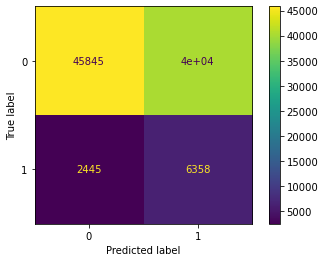

In [ ]:
# TRAINING MODEL ON SVM
#create a model SVC(kernel='linear') and fit  X_train_balanced , y_train_balanced
model_svm = SVC(kernel='linear').fit(X_train_balanced, y_train_balanced)

#predict the X_test_req
y_predicts = model_svm.predict(X_test_req)

#classification REeport
print(classification_report(y_test,y_predicts))

#confusion Matrix
print(confusion_matrix(model_svm,X_test_req,y_test))


## Adaboost

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      9568
           1       0.14      0.62      0.22       980

    accuracy                           0.60     10548
   macro avg       0.54      0.61      0.48     10548
weighted avg       0.86      0.60      0.68     10548



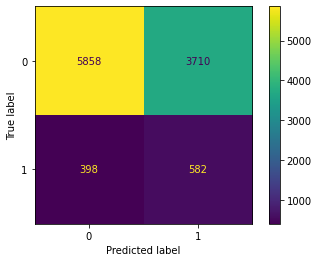

In [ ]:
# TRAINING MODEL ON ADABOOST
#create a model AdaBoostClassifier() and fit  X_train_balanced , y_train_balanced
model_ada = AdaBoostClassifier().fit(X_train_balanced, y_train_balanced)

#predict the X_test_req
y_predicts = model_ada.predict(X_test_req)

#classification REeport
print(classification_report(y_test,y_predicts))

#confusion Matrix
print(confusion_matrix(model_ada,X_test_req,y_test))





# Gradient Boosting

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      9568
           1       0.14      0.62      0.22       980

    accuracy                           0.60     10548
   macro avg       0.54      0.61      0.48     10548
weighted avg       0.86      0.60      0.68     10548



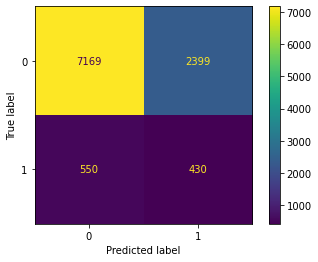

In [ ]:
# TRAINING MODEL ON GB
#create a model GradientBoostingClassifier() and fit  X_train_balanced , y_train_balanced
model_gb = GradientBoostingClassifier().fit(X_train_balanced, y_train_balanced)

#predict the X_test_req
y_predicts = model_gb.predict(X_test_req)

#classification REeport
print(classification_report(y_test,y_predicts))

#confusion Matrix
print(confusion_matrix(model_gb,X_test_req,y_test))



## we will hyper paramter tune the RandomForestClassifier as it performed the best

# Hyper-Parameter Tuning

In [ ]:
#import libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
#HYper parameter tuning

#rf_params = {'n_estimators':[100,200,300],
#             'max_features':[5,7,'auto',8],
#             'min_samples_split':[2,8,15,20],
#             'max_depth':[5,8,15,None,10],
#             "criterion": ["gini", "entropy"]}


In [ ]:
#HYper parameter tuning

rf_params = {'n_estimators':[200,300],

             "criterion": ["gini", "entropy"]}


In [ ]:
#create an object of RandomizedSearchCV with RandomForest as base estimator with cross validation as StratifiedKfold

#create an object of StratifiedKFold with n_splits=5
cross_val = StratifiedKFold(n_splits=5)

#craete an object of RandomF classifier
clf = RandomForestClassifier()

#create a RandomizedSearchCV with clf,rf_params,n_iter=20,cross_val,n_jobs=-1
random_search = RandomizedSearchCV(clf,rf_params,n_iter=20,cross_val,n_jobs=-1)

#fit the random_search on  X_train_balanced , y_train_balanced
random_search.fit( X_train_balanced , y_train_balanced)

In [ ]:
#print teh best_estimator_ for random_search
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=300)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      9568
           1       0.14      0.06      0.08       980

    accuracy                           0.88     10548
   macro avg       0.52      0.51      0.51     10548
weighted avg       0.84      0.88      0.86     10548



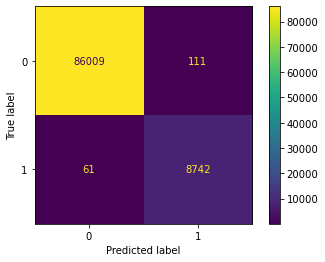

In [ ]:
#Train the model with the best parameters

#create a RFC with the best_estimator
model_rf = RandomForestClassifier(criterion='gini', max_features='auto', max_depth=15, min_samples_split=20, n_estimators=300)

#fit the model_rf on X_train_balanced,y_train_balanced
model_rf.fit(X_train_balanced,y_train_balanced)

#predict the X_test_req
y_predicts = model_rf.predict(X_test_req)

#classification report
print(classification_report(y_test,y_predicts))

#confusion matrix
print(confusion_matrix(model_rf,X_test_req,y_test))


### After doing a lot of training and Handling the imbalance we have arrived to the final model.

### The final model has FN around 61 which is very less.

### You will be surprised that we have got so good results on this project that such low FN is nowhere, such a low value for all the solutions available on the Internet.


# Great JOB!!!

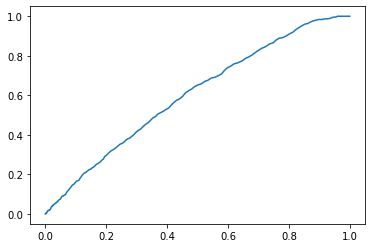

In [ ]:
#import the ROC curve and print plot the ROC-Curve
from sklearn.metrics import roc_curve

#calculate fpr,tpr
fpr,tpr,thresholds = roc_curve(y_test,model_rf.predict(X_test_req)[::,1])

#calculate area under the curve to disply
plt.plot(fpr,tpr)


plt.show()

<AxesSubplot:ylabel='count'>

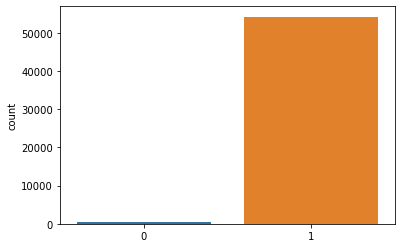

In [ ]:
#import the test_v2 and predict the fraud transactions in that dataset.

test = pd.read_csv("test_v2.csv",index_col="id")

#we will repeat all the pre=processions steps we have done for training

#drop all the rows in which null values are present
test = test.dropna(axis=0)

#run afor loop to transfrom the test data using scaler
for col in test.columns:
    test[col] = scaler.transform(test[[col]])

#select only the important features we used for traing after PermutationImportance in training
test_transformed = np.array(test[features])

#predict the test_transformed using model_rf
predicted_test = model_rf.predict(test_transformed)

#print the count_plot
sns.countplot(predicted_test)


In [ ]:
#print the value_counts of predicted_test
pd.DataFrame(predicted_test).value_counts()

1    54277
0      490
dtype: int64

Note:   we have tried almost all the ways of numerical feature selection technique's but all of that was not possible to show here...so we have tried to show you all the important feature selection tecniques in this project and further for handling the imbalnce we have used all the techniques like undersampling,oversampling,smote..but our finally result was best when we used SMOTETomek.

**Note** There are this much of estimator presents upon which you can apply hyperparameter tunning.

Explore these by yourself, try and do experiment and see the changes by changing the parameters and it's values

# Conclusion:


1.   We applied hyperparametr tuning on Random Forest considering the best performing model
2.  This is how we come to the best perfoming model over pridicting loan defaulter.
3. Now, we are capable of dealing with the case of loan default and ready to reduce the chance of default and help finance sector or loan delear to optimise the risk and enhance the profit

# Points to Remember


*   As the we are working on hypothetical bakining dataset. In real life the data is given by Finance sector itself only and it is higly confidential. There you enjoy the real taste of working with financial data.
*   While working with large dataset and performing hyperparameter tuning, it's sometimes like minutes, sometimes hour and hours as well. So don't panic it depends upon the values, parameter and type of algorithm you have choosen for hyperparameter tuning.

